## KLASIFIKASI CITRA MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK (CNN)

Nama : Dewan Dinata Tarigan | Email : dinatadewan@gmail.com | ID Dicoding : dwndnt

### Data Preparation & Pre-processing

Tahap ini melibatkan proses pemisahan data berdasarkan kelas, di mana setiap kelas mewakili satu kategori, yaitu 'rock', 'paper', dan 'scissors'. Setelah pemisahan, dataset akan dibagi menjadi dua subset, yaitu set training dan set validasi. Ukuran set validasi ialah 40% dari total dataset. Setelah pemisahan, dilakukan pra-pemrosesan data menggunakan metode augmentasi.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import shutil

# Load direktori dataset
data_dir = 'rockpaperscissors'

# List subdirektori dataset
class_subdirectories = ['rock', 'paper', 'scissors']

# Membuat subdirektori train dan val
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# memindahkan file ke subdirektori
def move_files(source_dir, target_dir, file_extension):
    for filename in os.listdir(source_dir):
        if filename.endswith(file_extension):
            source = os.path.join(source_dir, filename)
            destination = os.path.join(target_dir, filename)
            os.makedirs(os.path.dirname(destination), exist_ok=True)
            shutil.move(source, destination)

# Splitting Dataset
for class_dir in class_subdirectories:
    class_path = os.path.join(data_dir, class_dir)
    train_class_dir = os.path.join(train_dir, class_dir)
    validation_class_dir = os.path.join(validation_dir, class_dir)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)

    class_files = [file for file in os.listdir(class_path) if file.endswith(".png")]
    random.shuffle(class_files)
    split_index = int(0.4 * len(class_files))

    train_files = class_files[:split_index]
    validation_files = class_files[split_index:]

  
    for file in train_files:
        source = os.path.join(class_path, file)
        destination = os.path.join(train_class_dir, file)
        shutil.move(source, destination)

    for file in validation_files:
        source = os.path.join(class_path, file)
        destination = os.path.join(validation_class_dir, file)
        shutil.move(source, destination)

# Augmentasi citra dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# generate train & val
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=class_subdirectories 
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=class_subdirectories 
)


Found 874 images belonging to 3 classes.
Found 1314 images belonging to 3 classes.


### MEMBANGUN MODEL CNN

Setelah melakukan pre-processing & splitting data, selanjutnya ialah membangun model CNN menggunakan beberapa parameter, seperti berikut :

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax') 
])


#### PELATIHAN MODEL CNN

Kemudian model CNN dilatih menggunakan set training yang sudah disiapkan sebelumnya.

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,  # Sesuaikan jumlah epoch sesuai kebutuhan
    validation_data=validation_generator
)


Epoch 1/10
28/28 [==============================] - 28s 952ms/step - loss: 1.1679 - accuracy: 0.4016 - val_loss: 1.1130 - val_accuracy: 0.3318
Epoch 2/10
28/28 [==============================] - 28s 1s/step - loss: 0.9672 - accuracy: 0.5435 - val_loss: 0.6254 - val_accuracy: 0.8219
Epoch 3/10
28/28 [==============================] - 27s 979ms/step - loss: 0.6897 - accuracy: 0.7128 - val_loss: 0.3141 - val_accuracy: 0.9209
Epoch 4/10
28/28 [==============================] - 30s 1s/step - loss: 0.4981 - accuracy: 0.7963 - val_loss: 0.2474 - val_accuracy: 0.9224
Epoch 5/10
28/28 [==============================] - 29s 1s/step - loss: 0.4234 - accuracy: 0.8444 - val_loss: 0.3572 - val_accuracy: 0.8394
Epoch 6/10
28/28 [==============================] - 32s 1s/step - loss: 0.4512 - accuracy: 0.8169 - val_loss: 0.2996 - val_accuracy: 0.8714
Epoch 7/10
28/28 [==============================] - 30s 1s/step - loss: 0.3873 - accuracy: 0.8661 - val_loss: 0.1628 - val_accuracy: 0.9536
Epoch 8/10
28/

### EVALUASI MODEL

Selanjutnya model dievaluasi menggunakan set validasi

In [5]:
test_loss, test_accuracy = model.evaluate(validation_generator)

print("Akurasi model: {:.2f}%".format(test_accuracy * 100))


42/42 [==============================] - 7s 156ms/step - loss: 0.1150 - accuracy: 0.9673
Akurasi model: 96.73%


Hasil evaluasi menunjukkan bahwa model memiliki akurasi sebesar 96,73% dalam mengklasifikasikan citra menurut kelas

### UJI COBA MODEL

Pada tahap ini dilakukan uji coba menggunakan salah satu data citra pada dataset

1/1 [==============================] - 0s 70ms/step


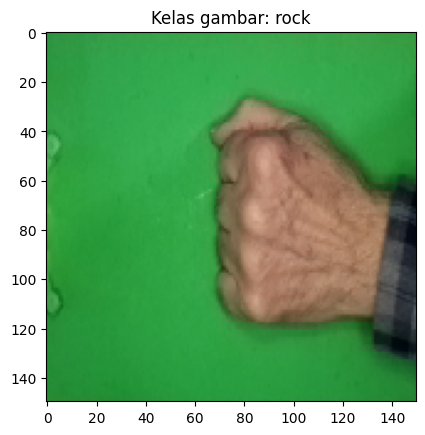

In [11]:
img = image.load_img(image_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.  # Normalisasi

predictions = model.predict(img)
class_index = np.argmax(predictions[0])

class_names = ['rock', 'paper', 'scissors']

predicted_class = class_names[class_index]

plt.imshow(img[0])
plt.title(f'Kelas gambar: {predicted_class}')
plt.show()


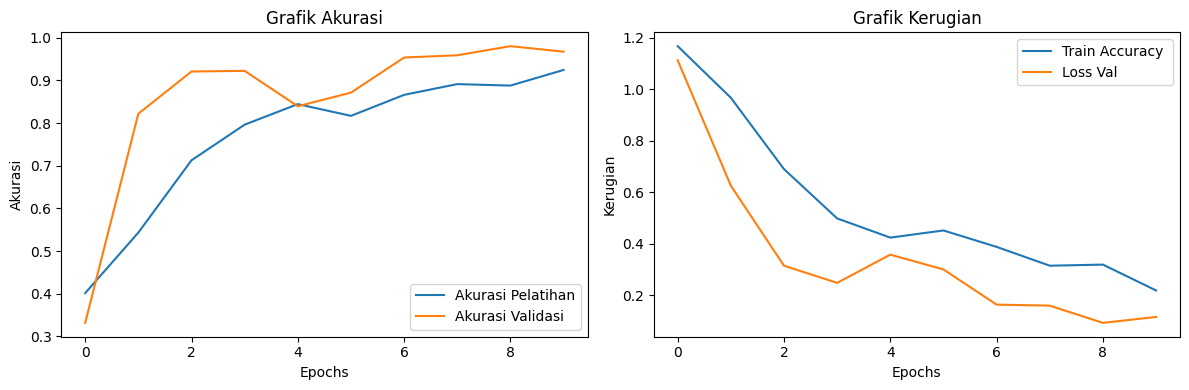

In [13]:
# Dapatkan data akurasi dan kerugian dari riwayat pelatihan
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot akurasi pelatihan dan validasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Akurasi Pelatihan')
plt.plot(validation_accuracy, label='Akurasi Validasi')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi')

# Plot kerugian pelatihan dan validasi
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Train Accuracy ')
plt.plot(validation_loss, label='Loss Val')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Kerugian')
plt.title('Grafik Kerugian')

plt.tight_layout()
plt.show()